<H1 style="font-size:50px">10: Metodi Numerici in Python (SciPy)</H1>


<div style = "width:95%; padding:5px 10px 5px;  margin:50px 0px 10px 10px; font-size:18px">
<UL>
    <LI> La libreria SciPy
    <LI> Come calcolare numericamente un integrale definito
    <LI> Come risolvere numericamente una equazione differenziale ordinaria
    <LI> Come trovare numericamente gli zeri di una funzione
    <LI> Come trovare il miglior fit di un set di dati
    <LI> Come trovare numericamente massimi e minimi di una funzione
</UL>
</div>

<hr>

        
## 10.1 Nozioni fondamentali

La libreria scipy (SCIentific PYthon) fornisce un gran numero di algoritmi numerici. In questo notebook vengono presentati quelli di uso più comune che servono a calcolare integrali, trovare zeri, massimi e minimi di funzioni, risolvere equazioni differenziali e interpolare dati.<BR>
`Scipy` è basata su `numpy`. Nella [documentazione di scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html) viene raccomandato di importare le due librerie separatamente.

In [1]:
import numpy as np
import scipy

La libreria `scipy` fornisce informazioni sulla propria struttura atrraverso il comando `help`:

```python
help(scipy)
```

L'output è molto lungo. Ne mostriamo solo una parte:

    stats       --- Statistical Functions [*]
    sparse      --- Sparse matrix [*]
    lib         --- Python wrappers to external libraries [*]
    linalg      --- Linear algebra routines [*]
    signal      --- Signal Processing Tools [*]
    misc        --- Various utilities that don't have another home.
    interpolate --- Interpolation Tools [*]
    optimize    --- Optimization Tools [*]
    cluster     --- Vector Quantization / Kmeans [*]
    fftpack     --- Discrete Fourier Transform algorithms [*]
    io          --- Data input and output [*]
    integrate   --- Integration routines [*]
    lib.lapack  --- Wrappers to LAPACK library [*]
    special     --- Special Functions [*]
    lib.blas    --- Wrappers to BLAS library [*]
      [*] - using a package requires explicit import (see pkgload)

Per trovare un algoritmo per integrare una funzione, si può esplorare la libreria `integrate`:

```python
import scipy.integrate

scipy.integrate?
```

produces:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Integrators of ODE systems
==========================

.. autosummary::
   :toctree: generated/

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
   complex_ode   -- Convert a complex-valued ODE to real-valued and integrate.
```

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#ff0000; margin:20px 0px 10px 10px">
    <h4> Attenzione!</h4>
    Qualunque manipolazione di una funzione nota deve partire dal grafico che guiderà i passi successivi. Nessun metodo per quanto potente è in grado di prendere sempre le decisioni corrette per una qualsiasi funzione il cui campo di esistenza e range di valori sono in linea di principio l'intero asse reale.<BR>
    <OL>
    <LI>Quando si deve fare un integrale è opportuno fare il grafico della funzione integranda per controllarne il comportamento. Singolarità (per esempio valori di $x$ in cui $f(x)$ tende a più o meno infinito) oppure altri comportamenti irregolari, come quello di $f(x)=\sin(\frac{1}{x}$) nell'intorno di $x = 0$, sono estremamente difficili e talvolta semplicemente impossibili da trattare numericamente.
    <LI> La ricerca di zeri oppure di massimi e minimi richiedono un punto oppure un intervallo iniziale. Il modo più semplice per determinare questi valori è esaminare graficamente la funzione.
        </OL>
Confrontare la risposta di un algoritmo con un grafico è spesso, quando possibile, il modo più semplice per verificarne la correttezza o perlomeno la non manifesta scorrettezza.
</div>

## 10.2 Integrazione numerica

<div style= "padding:20px 20px 0px 50px;">
    <img src="../Images/integral_comic_strip.png" width="900"/>

&nbsp;  
    (Svein Linge, Hans Petter Langtangen - Programming for Computations)
</div>

Scientific Python fornisce diverse routines di integrazione. Uno strumento di uso generale per calcolare integrali *I* del tipo

$$I=\int_a^b f(x) \mathrm{d} x$$

è la funzione `quad()` del modulo `scipy.integrate`.

Prende in input la funzione *f(x)* da integrare (l'“integrando”) e gli estremi inferiore e superiore *a* and *b*. 
Restituisce due valori, (in una tuple): il primo è il risultato dell'integrale mentre il secondo è una stima dell'errore numerico del risultato.

In [2]:
from scipy import integrate
help(integrate.quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        Th

Ecco un esempio:
$$I=\int_{-2}^{2} e^{\cos(-2 \pi x)} \,\mathrm{d} x$$

In [3]:
from math import cos, exp, pi
from scipy.integrate import quad

# funzione da integrare
def f(x):
    return exp(cos(-2 * x * pi))

# chiamata a quad
res, err = quad(f, -2, 2)

print(f"The numerical result is {res:f} (+-{err:g})")

The numerical result is 5.064264 (+-1.55117e-11)


Usando Numpy:

In [5]:
import numpy as np
def f_N(x):
    return np.exp(np.cos(-2 * x * np.pi))

res, err = quad(f_N, -2, 2)
print(f"The numerical result is {res:f} (+-{err:g})")

The numerical result is 5.064264 (+-1.55117e-11)


Si noti che `quad()` può prendere come parametri opzionali `epsabs` e `epsrel` per aumentare o diminuire l'accuratezza del calcolo (Usate `help(quad)` per maggiori informazioni). I valori di default sono `epsabs=1.5e-8` and `epsrel=1.5e-8`. Per il prossimo esercizio, i valori di default sono sufficienti.

### Integrazione su un intervallo infinito

In [6]:
def my_f(x):
    return 1/x/x

res, err = quad(my_f, 1, np.inf)
print(f"The numerical result is {res:f} (+-{err:g})")

The numerical result is 1.000000 (+-1.11022e-14)


### Integrazione di una funzione che dipende da parametri

Talvolta la funzione da integrare dipende da dei parametri. Per esempio la velocità di un corpo che si muove in un campo gravitazionale costante è dato da $v(t) =  g t + v_0 $
dove $v_0$ è la velocità a $t = 0$. Lo spostamento $y(t)$ può essere calcolato integrando questa relazione fra 0 e $t$<BR>
In questo caso la variabile su cui integrare deve essere al primo posto fra le variabili della funzione e i parametri addizionali vengono passati in una ntupla `args`:

In [7]:
from scipy.integrate import quad

def vel(t,v0):
    g = -9.81
    return g*t + v0

v0 = 10  # m/s
tf = 3  # s

y,err = quad(vel,0,tf,args=(v0,))
print(f"La posizione di un corpo che parte dall'origine con v0={v0} dopo {tf} secondi è {y} m")  

La posizione di un corpo che parte dall'origine con v0=10 dopo 3 secondi è -14.145000000000003 m


### Integrazione di una singolarità "integrabile":

In [8]:
def inv_square_root(x):
    return 1./np.sqrt(x)

res,err = quad(inv_square_root,0,1)
res,err

(1.9999999999999984, 5.773159728050814e-15)

### Integrazione di una singolarità "non integrabile":

In [9]:
def inv(x):
    return 1./x

res,err = quad(inv,0,1)
res

C:\Users\39331\AppData\Local\Temp\ipykernel_19796\2777679445.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res,err = quad(inv,0,1)


41.67684067538809

### Integrazione con metodo dei trapezi

<div style= 'padding:20px 20px 20px 150px;'>
    <img src="../Images/Trapezoid_Integration.png" width="400"/>
</div>

In [11]:
# https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/

import numpy as np

def my_trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N 
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [12]:
def vf(x):
    return np.exp(np.cos(-2 * x * np.pi))

res1 = my_trapz(vf,-2,2)
print(f"The numerical result is {res1:f}")

The numerical result is 5.064264


### Integrazione con metodo dei trapezi usando scipy.integrate.trapz

In [14]:
from scipy.integrate import trapz
#help(trapz)

L'input di `trapz` sono l'array delle coordinate `y` e quello delle coordinate `x` **in questo ordine**.

In [15]:
x = np.linspace(-2,2,101)
y = vf(x)
res2 = trapz(y,x)
res2

5.064263511008032

### Integrazione con metodo di Simpson usando scipy.integrate.simps

Anche per `simps` l'input è costituito dall'array delle coordinate `y` e da quello delle coordinate `x` nell'ordine.

In [16]:
from scipy.integrate import simps
#help(trapz)

In [17]:
x = np.linspace(-2,2,101)
y = vf(x)
res2 = simps(y,x)
res2

5.064263511008033

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI> Calcolate $I = \int_{-1}^1 (x^2 -1) \,dx$ usando <b>quad</b>, <b>trapz</b>, <b>simps</b>. Fate attenzione a quale tipo di informazione è necessario fornire nei vari casi. Variate il numero di punti utilizzati in <b>trapz</b> e <b>simps</b>.
<LI>Usando la funzione di scipy <b>quad</b>, scrivete un programmma che calcola numericamente l'integrale:  $I = \int_0^1\cos(2\pi x) dx$.
<LI>Integrare numericamente la funzione $ e^{-x/\mu} $ in $x$ fra zero e infinito per $\mu = 1,\, 2,\, 3$.
</OL>
</div>

In [27]:
import numpy as np 
from scipy.integrate import quad,simps,trapz

def f(x):
    return x**2 - 1

x = np.linspace(-1,1,100)
y = f(x)

res, err=quad(f,-1,1)
print(res)

res2 = trapz(y,x)
print(res2)

res3 = simps(y,x)
print(res3)

-1.3333333333333335
-1.3331972927932527
-1.3333319591864636


## 10.3 Risolvere  equazioni  differenziali ordinarie

<div style= 'padding:20px 20px 20px 50px;'>
    <img src="../Images/FE_comic_strip.png" width="900"/>

&nbsp;  
    (Svein Linge, Hans Petter Langtangen - Programming for Computations)
</div>


Per risolvere  equazioni  differenziali ordinarie del tipo
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

con condizione iniziale $y(t_0)=y_0$, si può usare la  funzione `odeint` di `scipy`. Ecco un esempio (`useodeint.py`) per determinare

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
data l'equazione  differenziale:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

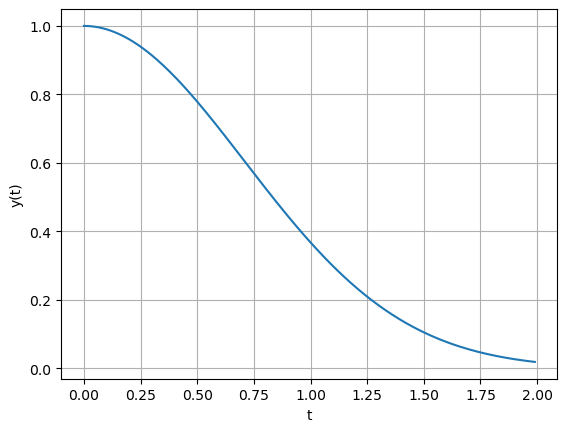

In [2]:
from scipy.integrate import odeint
import numpy as np

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = np.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import matplotlib.pyplot as plt         # plotting of results
fig, ax = plt.subplots()
ax.grid()
ax.plot(t,y)
ax.set_xlabel('t')
ax.set_ylabel('y(t)');

### Soluzione con il metodo di Eulero

In [4]:
# https://www.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/

def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y


In [5]:
y_E = odeEuler(f,y0,t)

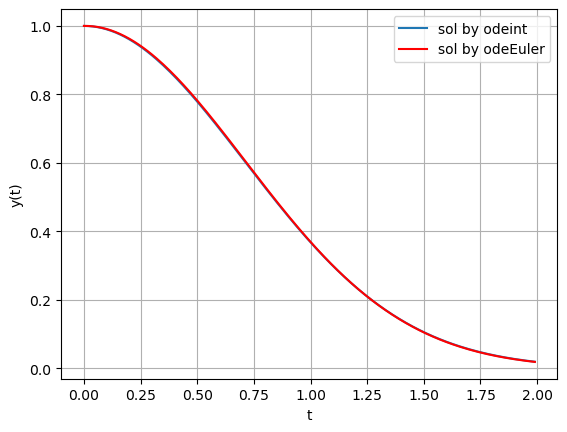

In [6]:
import matplotlib.pyplot as plt         # plotting of results
fig, ax = plt.subplots()
ax.plot(t,y,label='sol by odeint')
ax.plot(t,y_E,c='r',label='sol by odeEuler')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.grid()
ax.legend();

Il comando `odeint` può prendere diversi parametri opzionali per modificare l'errore di default nell'integrazione (e per produrre output addizionale che può essere utile per il debugging). Usate il comando help per farvene un'idea:

```python
help(scipy.integrate.odeint)
```

restituisce:

```
Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to function.
    Dfun : callable(y, t0, ...)
        Gradient (Jacobian) of `func`.
    col_deriv : bool, optional
        True if `Dfun` defines derivatives down columns (faster),
        otherwise `Dfun` should define derivatives across rows.
    full_output : bool, optional
        True if to return a dictionary of optional outputs as the second output
    printmessg : bool, optional
        Whether to print the convergence message
    
    Returns
    -------
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.
    infodict : dict, only returned if full_output == True
        Dictionary containing additional output information
    
        =======  ============================================================
        key      meaning
        =======  ============================================================
        'hu'     vector of step sizes successfully used for each time step.
        'tcur'   vector with the value of t reached for each time step.
                 (will always be at least as large as the input times).
        'tolsf'  vector of tolerance scale factors, greater than 1.0,
                 computed when a request for too much accuracy was detected.
        'tsw'    value of t at the time of the last method switch
                 (given for each time step)
        'nst'    cumulative number of time steps
        'nfe'    cumulative number of function evaluations for each time step
        'nje'    cumulative number of jacobian evaluations for each time step
        'nqu'    a vector of method orders for each successful step.
        'imxer'  index of the component of largest magnitude in the
                 weighted local error vector (e / ewt) on an error return, -1
                 otherwise.
        'lenrw'  the length of the double work array required.
        'leniw'  the length of integer work array required.
        'mused'  a vector of method indicators for each successful time step:
                 1: adams (nonstiff), 2: bdf (stiff)
        =======  ============================================================
    
    Other Parameters
    ----------------
    ml, mu : int, optional
        If either of these are not None or non-negative, then the
        Jacobian is assumed to be banded.  These give the number of
        lower and upper non-zero diagonals in this banded matrix.
        For the banded case, `Dfun` should return a matrix whose
        rows contain the non-zero bands (starting with the lowest diagonal).
        Thus, the return matrix `jac` from `Dfun` should have shape
        ``(ml + mu + 1, len(y0))`` when ``ml >=0`` or ``mu >=0``.
        The data in `jac` must be stored such that ``jac[i - j + mu, j]``
        holds the derivative of the `i`th equation with respect to the `j`th
        state variable.  If `col_deriv` is True, the transpose of this
        `jac` must be returned.
    rtol, atol : float, optional
        The input parameters `rtol` and `atol` determine the error
        control performed by the solver.  The solver will control the
        vector, e, of estimated local errors in y, according to an
        inequality of the form ``max-norm of (e / ewt) <= 1``,
        where ewt is a vector of positive error weights computed as
        ``ewt = rtol * abs(y) + atol``.
        rtol and atol can be either vectors the same length as y or scalars.
        Defaults to 1.49012e-8.
    tcrit : ndarray, optional
        Vector of critical points (e.g. singularities) where integration
        care should be taken.
    h0 : float, (0: solver-determined), optional
        The step size to be attempted on the first step.
    hmax : float, (0: solver-determined), optional
        The maximum absolute step size allowed.
    hmin : float, (0: solver-determined), optional
        The minimum absolute step size allowed.
    ixpr : bool, optional
        Whether to generate extra printing at method switches.
    mxstep : int, (0: solver-determined), optional
        Maximum number of (internally defined) steps allowed for each
        integration point in t.
    mxhnil : int, (0: solver-determined), optional
        Maximum number of messages printed.
    mxordn : int, (0: solver-determined), optional
        Maximum order to be allowed for the non-stiff (Adams) method.
    mxords : int, (0: solver-determined), optional
        Maximum order to be allowed for the stiff (BDF) method.
    
    See Also
    --------
    ode : a more object-oriented integrator based on VODE.
    quad : for finding the area under a curve.
    
    Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and it initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We generate a solution 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

```

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
Scrivete un programma che calcola la soluzione *y(t)* della ODE seguente, usando l'algoritmo `odeint`,
    $$\frac{\mathrm{d}y}{\mathrm{d}t} =  -\exp(-t)(10\sin(10t)+\cos(10t))$$
     da $t=0$ a $t = 10$. Il valore iniziale è $y(0)=1$.<BR>
    Mostrate graficamente la soluzione, valutandola nei punti $t=0$, $t=0.01$, $t=0.02$, ..., $t=9.99$, $t=10$.<BR>
    Aiutino: una parte della soluzione $y(t)$ è presentata nella figura seguente.
</div>

<div style= 'padding:20px 20px 20px 80px;'>
    <img src="../Images/11_odeintsolution8to10.png" alt="image" />
</div>

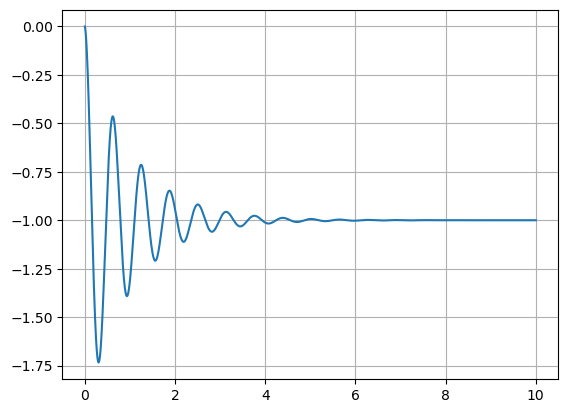

In [7]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def f(y,t):
    return -np.exp(-t)*(10*np.sin(10*t)+np.cos(10*t))

t = np.linspace(0,10,10000)
y0 = 0

y = odeint(f, y0, t)
fig, ax = plt.subplots()
ax.grid()
ax.plot(t,y);


## 10.4 Ricerca delle radici

Cercare una $x$ tale che $f(x)=0$
si chiama *ricerca delle radici* di $f$. Si noti che un problema del tipo $g(x)=h(x)$ può essere riformulato come $f(x)=g(x)−h(x)=0$.

Il modulo `optimize` di `scipy` fornisce diversi strumenti per la ricerca delle radici.

<p><br></p>

<div style= 'padding:20px 20px 20px 50px;'>
    <img src="../Images/comic_root.png" width="900" />

&nbsp;  
    (Svein Linge, Hans Petter Langtangen - Programming for Computations)

</div>
    
### Ricerca delle radici usando il metodo della bisezione 

L'algoritmo `bisect` è (i) robusto e (ii) concettualmente molto semplice (ma lento).

Supponiamo di dover calcolare le radici di $f(x)= x^3 − 2 x^2$. Questa funzione ha una radice (doppia) in $x = 0$ e un'altra fra $x = 1.5$ (dove $f(1.5) = − 1.125$) e $x = 3$ (dove $f(3) = 9$). È facile vedere che questa altra radice si trova in $x = 2$. Ecco il programma che determina la radice numericamente:

In [49]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here. Typically, the range in which to perform the search is determined from a plot.
x = bisect(f, 1.5, 3, xtol=1e-6)

print(f"The root x is approximately x={x:14.12g},\n"
      f"the error is less than 1e-6.")
print(f"The exact error is {2 - x:g}.")

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


Il metodo `bisect()` richiede obbligatoriamente tre argomenti: (i) la funzione *f(x)*, (ii) il limite inferiore *a* (che abbiamo scelto uguale a 1.5 nell'esempio) e (ii) il limite superiore *b* (scelto uguale a 3)  dell'intervallo in cui eseguire la procedura. Il parametro opzionale `xtol` determina l'errore massimo del metodo.

Uno dei presupposti del metodo di bisezione è che l'intervallo \[*a*, *b*\] sia scelto in modo tale che la funzione abbia in *a* segno opposto a quello che ha in *b* in modo che nell'intervallo, se la funzione è continua, cada almeno una radice.

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
Scrivete un programma chiamato `sqrttwo.py` per cercare la radice *x* della funzione $f(x)=2 − x^2$ usando il metodo di bisezione. Scegliete come tolleranza per l'approssimazione alla radice di 10<sup>−8</sup>.
<OL>
<LI>Giustificate la scelta dell'intervallo iniziale $[a, b]$ per la ricerca: che valori evte scelto per *a* e *b*? Perchè?
<LI>Esaminate i risultati:
    <OL>
        <LI>Che valore restituisce l'algoritmo di bisezione per la radice *x*?
        <LI>Calcolate il valore di $\sqrt{2}$ usando <b>math.sqrt(2)</b> e confrontatelo il risultato precedente. Quanto è grande l'errore assoluto?                Come si confronta con <b>xtol</b>?
    </OL>
</OL>
</div>

In [56]:
def f(x): 
    return 2 - x**2

err = 10**(-8)
a = 3
b = 1 
a1 = 1 
b1= 4

x1 = bisect(f, -3, 1, xtol=err)
x2 = bisect(f, 1, 4, xtol=err)

print(f"The first root x1 is approximately x = {x1:14.12g}\n")
print(f"The second root x2 is approximately x = {x2:14.12g}\n")

The first root x1 is approximately x = -1.41421356052

The second root x2 is approximately x =  1.41421356611



### Ricerca delle radici usando la funzione `fsolve`

Un algoritmo per la ricerca delle radici che è (spesso) migliore (nel senso di “più efficiente”) di quello di bisezione è codificato nella funzione `fsolve()` che funziona anche per problemi a più dimensioni. Questo algoritmo richiede solamente un punto di partenza vicino a dove ci si aspetta che ci sia una radice (Non è però detto che il metodo converga).

Ecco un esempio:

In [57]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

xstart = 3
x = fsolve(f, xstart)      # one root is at x=2.0
                           # search starts at x=3
                           # fsolve returns a numpy array

print(f"The root x is approximately x={x[0]:21.19g}")
print(f"The exact error is {2 - x[0]:g}.")

The root x is approximately x= 2.000000000000006661
The exact error is -6.66134e-15.


Il valore restituito da `fsolve` è un array di numpy di lunghezza $n$ per un problema di ricerca di radici con $n$ variabili. Nell'esempio precedente, $n = 1$.

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Studiate il grafico della funzione y(x) = np.cos(2*x) - np.cosh(-x+1) + 2, cambiando l'intervallo di variazione dell'ascissa fino determinare il numero e la  posizione approssimata degli zeri.  Trovate il valore degli zeri usando <b>fsolve</b> 
</OL>
</div>

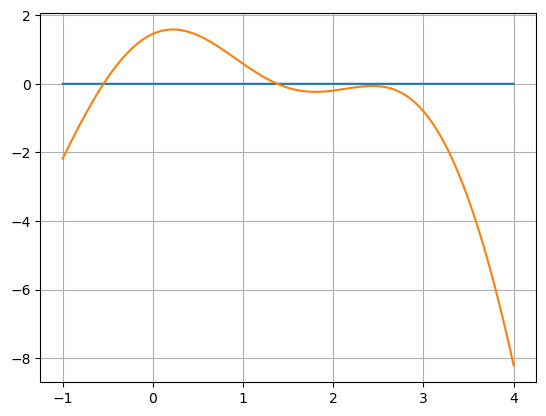

In [9]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    return np.cos(2*x) - np.cosh(-x+1) + 2

x = np.linspace(-1,4,10000)
y = fun(x)
y1 = np.zeros(10000)
fig, ax = plt.subplots()
ax.plot(x,y1)
ax.grid()
ax.plot(x,y);

In [84]:
xstart = -1
x1 = fsolve(f, xstart)
print(f"The root x is approximately x={x1[0]:21.19g}")

xstart = 1
x1 = fsolve(f, xstart)
print(f"The root x is approximately x={x1[0]:21.19g}")

xstart = 3
x1 = fsolve(f, xstart)
print(f"The root x is approximately x={x1[0]:21.19g}")

The root x is approximately x=-0.5479484350190527708
The root x is approximately x= 1.378990867374185525
The root x is approximately x= 2.432925188708662034


## 10.5 Fit di un set di dati

Scipy fornisce una funzione piuttosto flessibile (basato sull'algoritmo di Levenburg-Marquardt), `scipy.optimize.curve_fit`, per interpolare un set di dati. L'assunzione è che vengano dati un set di punti
$x_1, x_2,\cdots,x_N$, i corrispondenti valori $y_i$ e una dipendenza funzionale $y=f(x,\vec{p})$.
Per fare un esempio, il numero di atomi non decaduti in un campione di una sostanza radioattiva segue la legge
$$ N(t,N_0,\tau) = N_0\,\exp\left(-\frac{t}{\tau}\right).$$
Si vuole determinare i parametri $\vec{p}=(p_1, p_2, \ldots,p_k)$ in modo che $r$, la somma degli scarti quadratici fra la curva e i dati, sia la più piccola possibile:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

Questo approccio è particolarmente utile quando i dati sono affetti da *rumore*: per ogni coppia $x_i,y_i$ è presente un termine di errore (ignoto) $\epsilon_i$, tale che $y_i=f(x_i,\vec{p})+\epsilon_i$.

Un esempio per chiarire: assumiamo di avere dei dati che sappiamo essere descritti dalla funzione:
$$f(x,\vec{p}) = a \exp(-b x) + c,$$
che dipende dai parametri $\vec{p}=(a,b,c)$, che devono essere determinati usando i dati.

Optimal parameters are af=2.61932, bf=1.31253, and cf=0.47629.


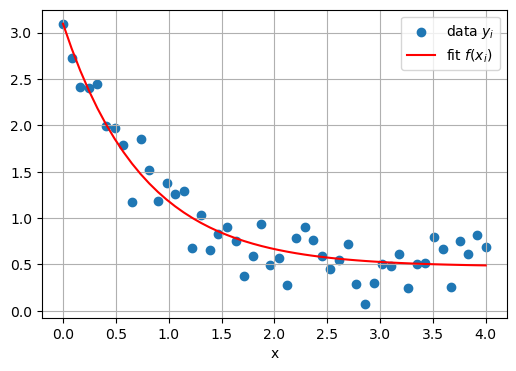

In [11]:
import numpy as np
from scipy.optimize import curve_fit

def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
# extract fit parameters
af, bf, cf = popt
print(f"Optimal parameters are af={af:g}, bf={bf:g}, and cf={cf:g}.")

# best fit curve
yfitted = f(x,af,bf,cf)

#plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, yi, marker='o', label='data $y_i$')
ax.plot(x, yfitted, c='r', label='fit $f(x_i)$')
ax.set_xlabel('x')
ax.grid()
ax.legend();

Si noti che nell'esempio precedente abbiamo definito la funzione da utilizzare per il fit $y = f(x)$ usando del codice Python. Quindi possiamo utilizzare una funzione (quasi) arbitraria nel metodo `curve_fit`.

La funzione `curve_fit` restituisce una tuple `popt, pcov`. Il primo elemento, `popt`, contiene l'ntupla dei parametri ottimali (OPTimal Parameters), cioè i parametri che minimizzano la somma degli scarti quadratici. Il secondo elemento contiene la matrice di covarianza di tutti i parametri (Sperimentazioni di Fisica). La diagonale fornisce la varianza della stima dei parametri. La standard deviation sulla stima dei parametri può quindi essere calcolata come
```
perr = np.sqrt(np.diag(pcov)).
```
L'algoritmo di Levenburg-Marquardt richiede, per iniziare la sua procedura, una stima iniziale dei parametri. Se questa non viene fornita, come nell'esempio precedente, il valore “1.0“ viene assunto come stima di partenza.

Se l'algoritmo non riesce a fittare i dati con la funzione ipotizzata, è necessario fornire a `curve_fit` una stima migliore per i parametri iniziali. Nell'esempio precedente potremmo passare le nostre stime cambiando la linea

```python
popt, pcov = curve_fit(f, x, yi)
```

in

```python
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))
```
se avessimo ragione di ritenere che *a* = 2, *b* = 1 and *c* = 0.6 siano dei valori "ragionevoli". Una volta che la stima iniziale è "più o meno corretta" il fit funziona bene. 

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
Un set di misure ha dato il risultato
<code>
array([ 1.98781717e-01  3.24825975e-01  2.98912925e-01  4.93741345e-02
  3.80536122e-01 -2.05719267e-01 -7.71630572e-03 -1.51733833e-01
  1.73748896e-02  9.02509179e-03 -2.20920245e-02  1.34501550e-02
  3.06908554e-01  2.34147443e-01  7.75703310e-01  4.99104499e-01
  5.66648179e-01  1.04641129e+00  1.67507051e+00  1.77283086e+00
  1.96239227e+00  2.27163706e+00  2.54161451e+00  3.09807009e+00
  3.45291476e+00  4.23653254e+00  4.58924190e+00  5.08824411e+00
  5.76377627e+00  6.04351916e+00  6.59161494e+00  7.25319841e+00
  7.96917169e+00  8.06559558e+00  8.91595385e+00  9.78458262e+00
  1.04143742e+01  1.14280612e+01  1.18132229e+01  1.25599940e+01
  1.35895984e+01  1.41159890e+01  1.53848688e+01  1.63810995e+01
  1.69877641e+01  1.77683845e+01  1.88923474e+01  1.95531287e+01
  2.12809123e+01  2.15518168e+01])
</code>
ai tempi
<code>
array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])
</code>
Trovate la parabola della forma <code>
y(t) = a*t**2 + b*t + c
</code>
che meglio approssima i dati.<BR>
Fate un plot dei dati e della curva ottenuta.
</div>

In [14]:
t = np.array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.])

Optimal parameters are af=2.4555, bf=1.50224, and cf=0.367855.


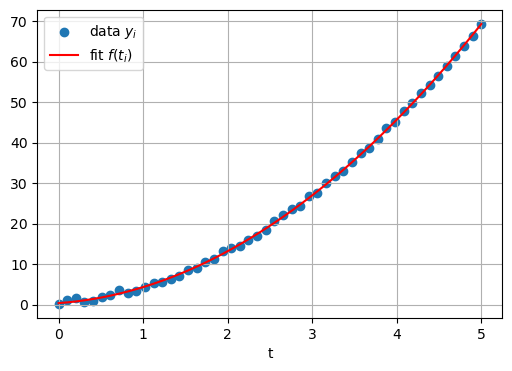

In [15]:
import numpy as np
from scipy.optimize import curve_fit

def f(t, a, b, c):
    """Fit function y=f(t,p) with parameters p=(a,b,c). """
    return a*(t**2) + b*t +c

#create fake data
y = f(t, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.4 * np.random.normal(size=len(t))

#call curve fit function
popt, pcov = curve_fit(f, t, yi)
# extract fit parameters
af, bf, cf = popt
print(f"Optimal parameters are af={af:g}, bf={bf:g}, and cf={cf:g}.")

# best fit curve
yfitted = f(t,af,bf,cf)

#plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(t, yi, marker='o', label='data $y_i$')
ax.plot(t, yfitted, c='r', label='fit $f(t_i)$')
ax.set_xlabel('t')
ax.grid()
ax.legend();

## 10.6 Ottimizzazione ovvero trovare massimi (e minimi)

Spesso è necessario trovare il massimo o il minimo di una particolare funzione *f(x)* dove *f* è una funzione scalare mentre *x* può essere un vettore. Applicazioni tipiche sono la minimizzazione di quantità come il costo, il rischio o l'errore, oppure la massimizzazione della produttività, efficienza o profitto. Le routines di ottimizzazione tipicamente forniscono un metodo per minimizzare una funzione data: per massimizzare *f(x)* è sufficiente minimizzare *g(x)= − f(x)*.

Di seguito, un esempio che mostra (i) la definizione della funzione *f(x)* da massimizzare e (ii) la chiamata a `scipy.optimize.fmin` a cui vengono passati la funzione *f* da minimizzare e un valore iniziale *x*<sub>0</sub> da cui partire per la ricerca del minimo, e che restituisce il valore *x* per cui *f(x)* ha un minimo locale. Tipicamente, la ricerca del minimo è locale, nel senso che l'algoritmo segue il gradiente (derivata multidimensionale) nel punto in cui si trova. 
Facciamo come prima cosa il grafico della funzione. Il plot suggerisce che i due minimi più a destra possono essere cercati partendo dai due punti *x*<sub>0</sub> = 1.0 e *x*<sub>0</sub> = 2.0. 

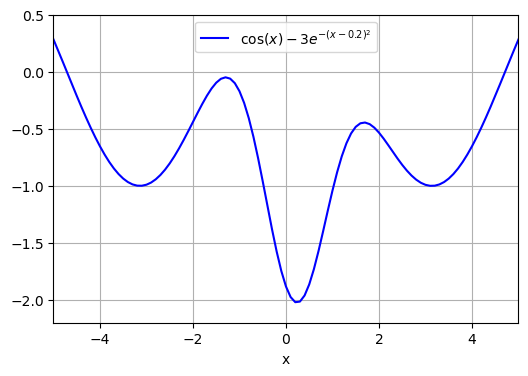

In [19]:
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x) - 3 * np.exp( -(x - 0.2) ** 2)

# plot function 
x = np.arange(-10, 10, 0.1)
y = f(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('x')
ax.grid(visible=True,which='both')
ax.set_xlim(-5.,5.)
ax.set_ylim(-2.2,0.5)

ax.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$', color="b")
ax.legend(loc='upper center');

Troviamo i due minimi con due chiamate a `fmin`. Il risultato mostra come, in generale, partendo da punti diversi troviamo minimi diversi. È anche possibile esistano punti iniziali che non portano a nessun minimo. Rigeneriamo il plot della funzione, mostrando i punti iniziali delle due ricerche e i minimi ottenuti:

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


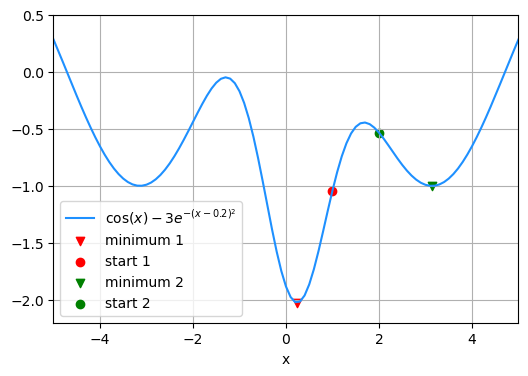

In [35]:
# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function again showing the minima that have been found
x = np.arange(-10, 10, 0.1)
y = f(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('x')
ax.grid(visible=True,which='both')
ax.set_xlim(-5.,5.)
ax.set_ylim(-2.2,0.5)

ax.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$', color="dodgerblue")
# add minimum1 to plot
ax.scatter(minimum1, f(minimum1), marker='v', c='r', label='minimum 1')
# add start1 to plot
ax.scatter(1.0, f(1.0), marker='o', c='r', label='start 1')

# add minimum2 to plot
ax.scatter(minimum2,f(minimum2), marker='v', c='g', label='minimum 2')
# add start2 to plot
ax.scatter(2.0,f(2.0), marker='o', c='g',label='start 2')

ax.legend(loc='lower left');

Come si vede, la chiamata a `fmin` produce anche dell'output addizionale che può essere utile per analizzare la procedura.

##### Valori ritornati da `fmin`

Si noti che la funzione `fmin` restituisce un numpy `array` che – nel caso precedente – contiene un solo numero dal momento che abbiamo una sola variabile (qui *x*) da variare. In generale, `fmin` può essre usata per trovare il minimo in uno spazio pluridimensionale. In questo caso, il numpy array contiene le coordinate del punto che minimizza la funzione obiettivo.

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Trovate massimi e minimi della funzione $f(x) = 2\, x^3 + 3\, x^2 - 12\, x - 10$.
<LI>Trovate la distanza minima fra il punto del piano (3,2) e la retta y = 3x -1.
</OL>
</div>

Altri metodi numerici
-----------------------

Scientific Python and Numpy forniscono molti altri algoritmi numerici: per esempio interpolazione di funzioni, trasformate di Fourier, ottimizzazione, funzioni speciali (Funzioni di Bessel etc.), generazione di numeri casuali, signal processing e filtri.


Ulteriori informazioni ed esempi:<BR> 
[Scipy-lectures](http://scipy-lectures.org/index.html).<BR>
[Robert Johansson - Scientific Computing with Python](http://raw.github.com/jrjohansson/scientific-python-lectures/master/Scientific-Computing-with-Python.pdf)<BR>
[Sven Linge, Hand Petter Langtangen - Programming for Computations](https://link.springer.com/book/10.1007/978-3-319-32428-9)